In [13]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
pip install seaborn --upgrade

     |████████████████████████████████| 294 kB 7.4 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [14]:
sns.reset_defaults()

Strategy A

In [15]:
dfA = pd.read_csv('/June Data with Trading Signals.csv', index_col=0)

dfA.head()

,DateTime_Minute,Bid1_Price,Bid1_Volume,Ask1_Price,Ask1_Volume,Bid2_Price,Bid2_Volume,Ask2_Price,Ask2_Volume,Mid-Price,...,Trade_Volume,Price_Mean,RSI,MACD,MACD_signal,MACD_hist,KDJ_K,KDJ_D,KDJ_J,Trading Signal
0,2025-06-02 07:30:00,111.00,2211.0,148.26,1371.0,108.47,1796.0,207.86,1403.0,129.63,...,97.0,112.61,52.83,-0.196021,-0.198977,0.002956,70.590658,68.966544,73.838884,Hold
1,2025-06-02 07:31:00,111.15,1845.0,159.25,1229.0,104.42,2542.0,238.43,1130.0,135.20,...,115.0,113.14,44.24,-0.495844,-0.258351,-0.237493,62.897872,66.943654,54.806310,Hold
2,2025-06-02 07:32:00,111.51,1581.0,161.75,1545.0,103.63,2152.0,245.34,1406.0,136.63,...,95.0,113.24,50.00,-0.677234,-0.342127,-0.335107,58.862843,64.250050,48.088428,Hold
3,2025-06-02 07:33:00,112.92,1399.0,188.79,1198.0,109.79,1420.0,235.82,1181.0,150.86,...,77.0,113.64,50.00,-0.412771,-0.356256,-0.056515,65.285270,64.595123,66.665564,Hold
4,2025-06-02 07:34:00,114.26,4271.0,154.78,2092.0,113.05,4829.0,215.01,1879.0,134.52,...,113.0,114.77,43.63,-0.420239,-0.369053,-0.051187,64.555043,64.581763,64.501602,Hold


In [16]:
true_A = dfA['Trading Signal']

In [17]:
true_A = true_A.iloc[20:10705]


true_A = true_A.to_frame()
true_A.shape

(10685, 1)

In [18]:
pre_A = pd.read_csv('/LSTM_signal_s1.csv', index_col=0)
pre_A.shape

(10685, 1)

In [19]:
# SA

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

label_encoder = LabelEncoder()
true_encoded = label_encoder.fit_transform(true_A)
predicted_encoded = label_encoder.transform(pre_A)


# Calculating accuracy
accuracy = accuracy_score(true_encoded, predicted_encoded)
print(f"Accuracy: {accuracy}")

# Generating confusion matrix
cm = confusion_matrix(true_encoded, predicted_encoded)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
print("Confusion Matrix:\n", cm_normalized)

f1_mac = f1_score(true_encoded, predicted_encoded, average='macro')
print(f"F1 Score (macro-average): {f1_mac}")

Accuracy: 0.5480580252690688
Confusion Matrix:
 [[0.71809072 0.28190928 0.        ]
 [0.49213162 0.46883303 0.03903536]
 [0.097      0.4835     0.4195    ]]
F1 Score (macro-average): 0.5495310065775639


/Users/chenyian/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenyian/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [32]:
type(cm_normalized)

numpy.ndarray

Confusion matrix

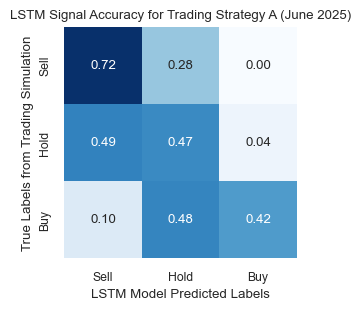

In [28]:
sns.font_scale=0.8

 
# plot
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm_normalized, annot=True, ax=ax, cmap="Blues", fmt=".2f", cbar = False)
ax.set_xlabel('LSTM Model Predicted Labels')
ax.set_ylabel('True Labels from Trading Simulation')
ax.set_title('LSTM Signal Accuracy for Trading Strategy A (June 2025)')
ax.xaxis.set_ticklabels(['Sell', 'Hold', 'Buy'])
ax.yaxis.set_ticklabels(['Sell', 'Hold', 'Buy'])
plt.savefig('/Users/chenyian/DS_mini_project/LSTM Matrix - Test Results A.png', dpi=600, bbox_inches='tight')
plt.show()

Strategy B

In [21]:
# import the strategy2 true labels
dfB = pd.read_csv('/June Data with Trading Signals + RSI.csv', index_col=0)
true_B = dfB['Trading Signal'].iloc[10710:]

/var/folders/fb/v28g5j8j16dcgjl7sfdg0zkr0000gn/T/ipykernel_5890/1808872775.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfB = pd.read_csv('/Users/chenyian/DS_mini_project/June Data with Trading Signals + RSI.csv', index_col=0)


In [22]:
true_B = true_B.to_frame()

true_B.shape

(10685, 1)

In [23]:
pred_B = pd.read_csv('/LSTM_signal_s2.csv', index_col=0)
pred_B.shape

(10685, 1)

In [24]:
label_encoderB = LabelEncoder()
true_encodedB = label_encoderB.fit_transform(true_B)
predicted_encodedB = label_encoderB.transform(pred_B)


# Calculating accuracy
accuracyB = accuracy_score(true_encodedB, predicted_encodedB)
print(f"AccuracyB: {accuracyB}")

# Generating confusion matrix
cmB = confusion_matrix(true_encodedB, predicted_encodedB)
cm_normalizedB = cmB.astype('float') / cmB.sum(axis=1)[:,np.newaxis]
print("Confusion MatrixB:\n", cm_normalizedB)

f1_macB = f1_score(true_encodedB, predicted_encodedB, average='macro')
print(f"F1 ScoreB (macro-average): {f1_macB}")

AccuracyB: 0.9902667290594291
Confusion MatrixB:
 [[0.54794521 0.45205479 0.        ]
 [0.00227273 0.99659091 0.00113636]
 [0.         0.67307692 0.32692308]]
F1 ScoreB (macro-average): 0.666259299840298


/Users/chenyian/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chenyian/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


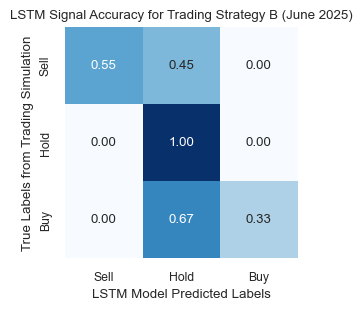

In [27]:
sns.font_scale=0.8

 
# plot
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(cm_normalizedB, annot=True, ax=ax, cmap="Blues", fmt=".2f", cbar = False)
ax.set_xlabel('LSTM Model Predicted Labels')
ax.set_ylabel('True Labels from Trading Simulation')
ax.set_title('LSTM Signal Accuracy for Trading Strategy B (June 2025)')
ax.xaxis.set_ticklabels(['Sell', 'Hold', 'Buy'])
ax.yaxis.set_ticklabels(['Sell', 'Hold', 'Buy'])
plt.savefig('/Users/chenyian/DS_mini_project/LSTM Matrix - Test Results B.png', dpi=600, bbox_inches='tight')
plt.show()